# Convolutional Neural Networks

<style>
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
    padding: 5px;
}

figcaption {
  font-style: italic;
  padding: 2px;
  text-align: center;
}

</style>

 <figure>
  <img src="img/cnn_banner.webp" alt="Software 2.0" width="70%">
  <figcaption>CNN</figcaption>
</figure>

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import torch.nn.functional as F

print(torch.__version__)
torch.cuda.is_available()

2.8.0+cu126


True

In [3]:
trans = transforms.Compose([
    transforms.RandomCrop([128, 128]),
    transforms.ToTensor()])

In [4]:
training_data = datasets.Imagenette(
    root="data",
    split="train",
    size="160px",
    download=True,
    transform=trans,
)

# Download test data from open datasets.
test_data = datasets.Imagenette(
    root="data",
    split="val",
    size="160px",
    download=True,
    transform=trans,
)

In [5]:
training_data

Dataset Imagenette
    Number of datapoints: 9469
    Root location: data
    StandardTransform
Transform: Compose(
               RandomCrop(size=(128, 128), padding=None)
               ToTensor()
           )

In [6]:
training_data.classes

[('tench', 'Tinca tinca'),
 ('English springer', 'English springer spaniel'),
 ('cassette player',),
 ('chain saw', 'chainsaw'),
 ('church', 'church building'),
 ('French horn', 'horn'),
 ('garbage truck', 'dustcart'),
 ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'),
 ('golf ball',),
 ('parachute', 'chute')]

In [7]:
first_image, first_label = training_data[10]

In [8]:
first_image.shape, first_label

(torch.Size([3, 128, 128]), 0)

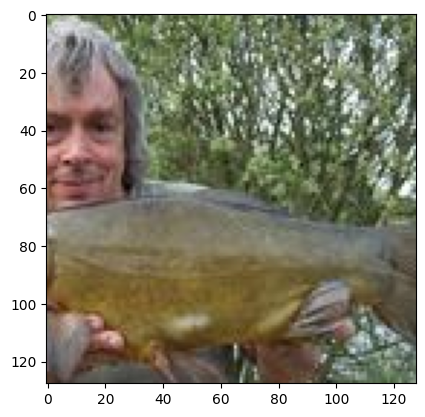

In [9]:
import matplotlib.pyplot as plt
import numpy as np

"""
Deep learning libraries like PyTorch and TensorFlow typically use channels-first format (C, H, W) for image tensors, while matplotlib expects channels-last format (H, W, C). The transpose operation rearranges the dimensions to make the tensor compatible with matplotlib's expectations.
"""

plt.imshow(np.transpose(first_image, (1, 2, 0)), cmap="gray")

In [11]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((5, 5))

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.adaptive_pool(x)  # Force to 5x5
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [12]:
model = SimpleCNN()
print(model)
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (adaptive_pool): AdaptiveAvgPool2d(output_size=(5, 5))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [13]:
batch_size = 64

# Create data loaders.
train_dl = DataLoader(training_data, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(test_data, batch_size=batch_size)

In [14]:
for b in train_dl:
    print(b[0].shape, b[1])
    break

torch.Size([64, 3, 128, 128]) tensor([0, 0, 5, 9, 5, 5, 1, 7, 3, 2, 6, 0, 1, 1, 8, 5, 8, 0, 0, 6, 9, 7, 0, 7,
        9, 4, 3, 9, 6, 5, 1, 4, 9, 5, 6, 5, 6, 2, 5, 0, 4, 2, 2, 0, 4, 8, 4, 1,
        9, 2, 1, 6, 4, 4, 8, 7, 8, 4, 7, 4, 1, 5, 6, 7])


In [15]:
from training_utils import train, plot_hist, evaluate

In [17]:
num_epochs = 10
hist = train(model, num_epochs, train_dl, val_dl)

Epoch 1: train_acc: 0.3702 val_acc: 0.3885 train_loss: 1.7855 val_loss: 1.7440
Epoch 2: train_acc: 0.4065 val_acc: 0.4082 train_loss: 1.7121 val_loss: 1.6869
Epoch 3: train_acc: 0.4302 val_acc: 0.4334 train_loss: 1.6516 val_loss: 1.6409
Epoch 4: train_acc: 0.4508 val_acc: 0.4573 train_loss: 1.5943 val_loss: 1.5839
Epoch 5: train_acc: 0.4785 val_acc: 0.4823 train_loss: 1.5303 val_loss: 1.5292
Epoch 6: train_acc: 0.4936 val_acc: 0.4846 train_loss: 1.4694 val_loss: 1.5295
Epoch 7: train_acc: 0.5160 val_acc: 0.4897 train_loss: 1.4287 val_loss: 1.4981
Epoch 8: train_acc: 0.5204 val_acc: 0.5180 train_loss: 1.4036 val_loss: 1.4089
Epoch 9: train_acc: 0.5449 val_acc: 0.5320 train_loss: 1.3522 val_loss: 1.4086
Epoch 10: train_acc: 0.5573 val_acc: 0.5231 train_loss: 1.3255 val_loss: 1.3918


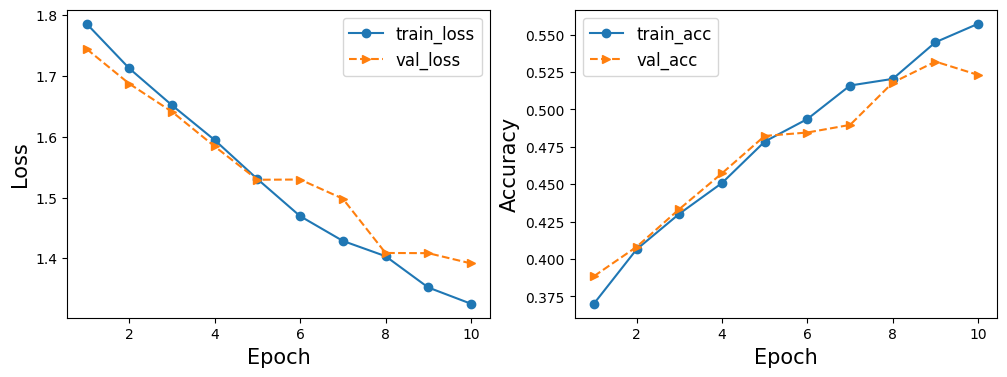

In [18]:
plot_hist(hist)

## Layers

### MaxPool2d

Why Max Pooling helps:
- Reduces overfitting by lowering the spatial resolution.
- Speeds up training because fewer parameters are processed.
- Focuses on dominant features (edges, textures) instead of precise pixel details.
- Adds robustness to small shifts or distortions in the input image.

In [6]:
import torch
import torch.nn as nn

# Create a 4x4 input tensor (1 batch, 1 channel)
input_tensor = torch.tensor([
    [[
        [1.0, 3.0, 2.0, 4.0],
        [5.0, 6.0, 1.0, 2.0],
        [0.0, 2.0, 4.0, 3.0],
        [1.0, 1.0, 2.0, 2.0]
    ]]
])

print("Input tensor shape:", input_tensor.shape)
print("Input tensor:")
print(input_tensor)

pool = nn.MaxPool2d(kernel_size=2)
output = pool(input_tensor)

print("\nOutput tensor shape:", output.shape)
print("Output tensor:")
print(output)

# input_tensor.squeeze().shape


Input tensor shape: torch.Size([1, 1, 4, 4])
Input tensor:
tensor([[[[1., 3., 2., 4.],
          [5., 6., 1., 2.],
          [0., 2., 4., 3.],
          [1., 1., 2., 2.]]]])

Output tensor shape: torch.Size([1, 1, 2, 2])
Output tensor:
tensor([[[[6., 4.],
          [2., 4.]]]])


torch.Size([4, 4])

### AdaptiveAvgPool2d

In [9]:
S = 5

pool = nn.AdaptiveAvgPool2d((S, S))

x = torch.randn(1, 64, 8, 8)  # batch=1, channels=64, height=8, width=8
print(x.shape)
y = pool(x)

print(y.shape)


torch.Size([1, 64, 8, 8])
torch.Size([1, 64, 5, 5])


### Dropout

- nn.Dropout(p=0.5) means each neuron has a 50% chance of being zeroed during training.
- Dropout is automatically disabled during evaluation (model.eval()).
- Use it mainly in fully connected layers, not convolutional layers (though Dropout2d exists).
- Helps to avoid overfitting -> better generalization

### Overfitting

 <figure>
  <img src="img/overfitting.png" alt="Overfitting" width="70%">
  <figcaption>Overfitting</figcaption>
</figure>

 <figure>
  <img src="img/overfitting_2.png" alt="Overfitting" width="50%">
  <figcaption>Overfitting</figcaption>
</figure>

### Common Overfitting Triggers

| Cause                        | Example                               | Fix                                        |
| ---------------------------- | ------------------------------------- | ------------------------------------------ |
| Dataset too small            | 200 images/class                      | Use transfer learning (freeze more layers) |
| Large LR on fine-tuned model | LR = 1e-3 when fine-tuning all layers | Use smaller LR (1e-5–1e-4)                 |
| No regularization            | No dropout or weight decay            | Add dropout or L2 regularization           |
| No augmentation              | Only raw images                       | Add random flips, rotations, color jitter  |
| Too many epochs              | 50+ on small dataset                  | Use early stopping                         |